In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

import random

random.seed(42)

In [12]:
df = pd.read_csv('train.csv', index_col='id')

df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

In [4]:
df_num = df.select_dtypes(include=np.number)
df_num.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
10%,2.200000e+01,2.627000e+03,0.000000e+00,9.936849e+00,0.000000,2.000000e+00,3.830000e+02,1.000000e+00,1.500000e+02
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
90%,6.000000e+01,8.107500e+04,4.000000e+00,4.328134e+01,2.000000,1.800000e+01,7.920000e+02,9.000000e+00,2.363000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [6]:
print('Пропуски: ', df_num.isna().sum())


Пропуски:  Age                      18705
Annual Income            44949
Number of Dependents    109672
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Premium Amount               0
dtype: int64


In [14]:
df = df.dropna(subset=['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration'])    #Дропаем у кого меньше 5% пропусков

print(df.select_dtypes(include=np.number).isna().sum())

Age                          0
Annual Income                0
Number of Dependents     98050
Health Score                 0
Previous Claims         323378
Vehicle Age                  0
Credit Score            123272
Insurance Duration           0
Premium Amount               0
dtype: int64


In [15]:
#Заменим na значения на медиану

df['Previous Claims'] = df['Previous Claims'].fillna(df['Previous Claims'].median())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Number of Dependents'] = df['Number of Dependents'].fillna(df['Number of Dependents'].median())

print(df.select_dtypes(include=np.number).isna().sum())

Age                     0
Annual Income           0
Number of Dependents    0
Health Score            0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
dtype: int64


Age
Annual Income
Number of Dependents
Health Score
Previous Claims
Vehicle Age
Credit Score
Insurance Duration
Premium Amount


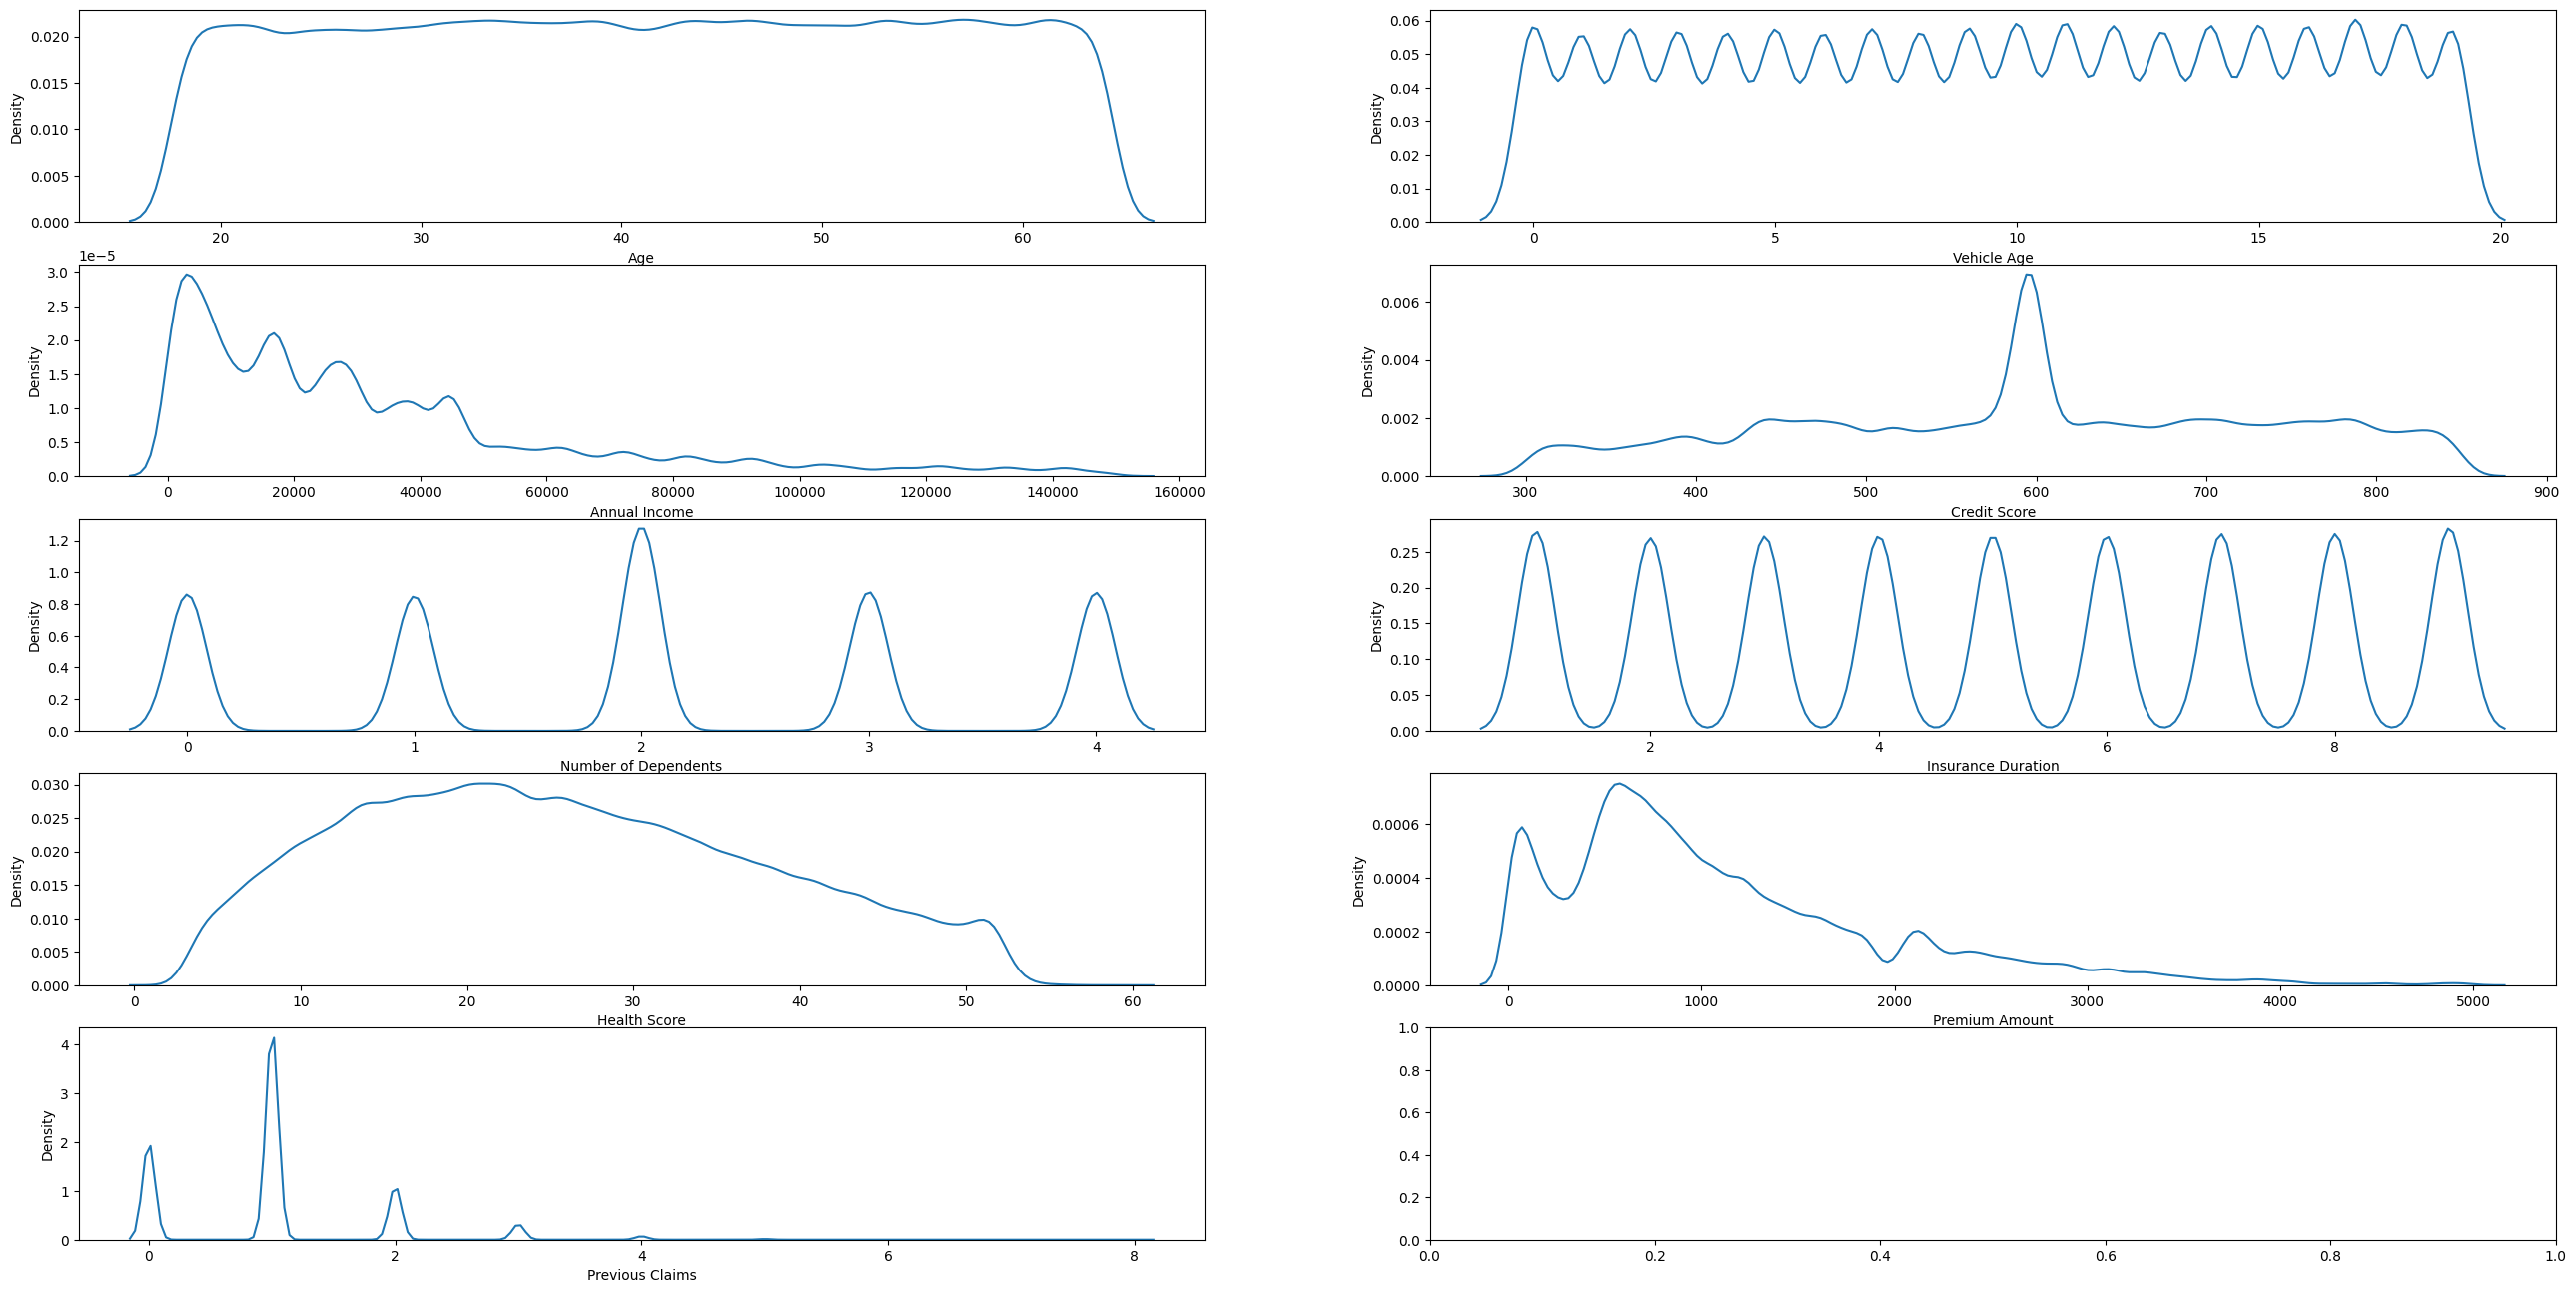

In [20]:
df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.kdeplot(data=df_num, x=col, ax=axes[idx % 5, idx // 5])

<Axes: >

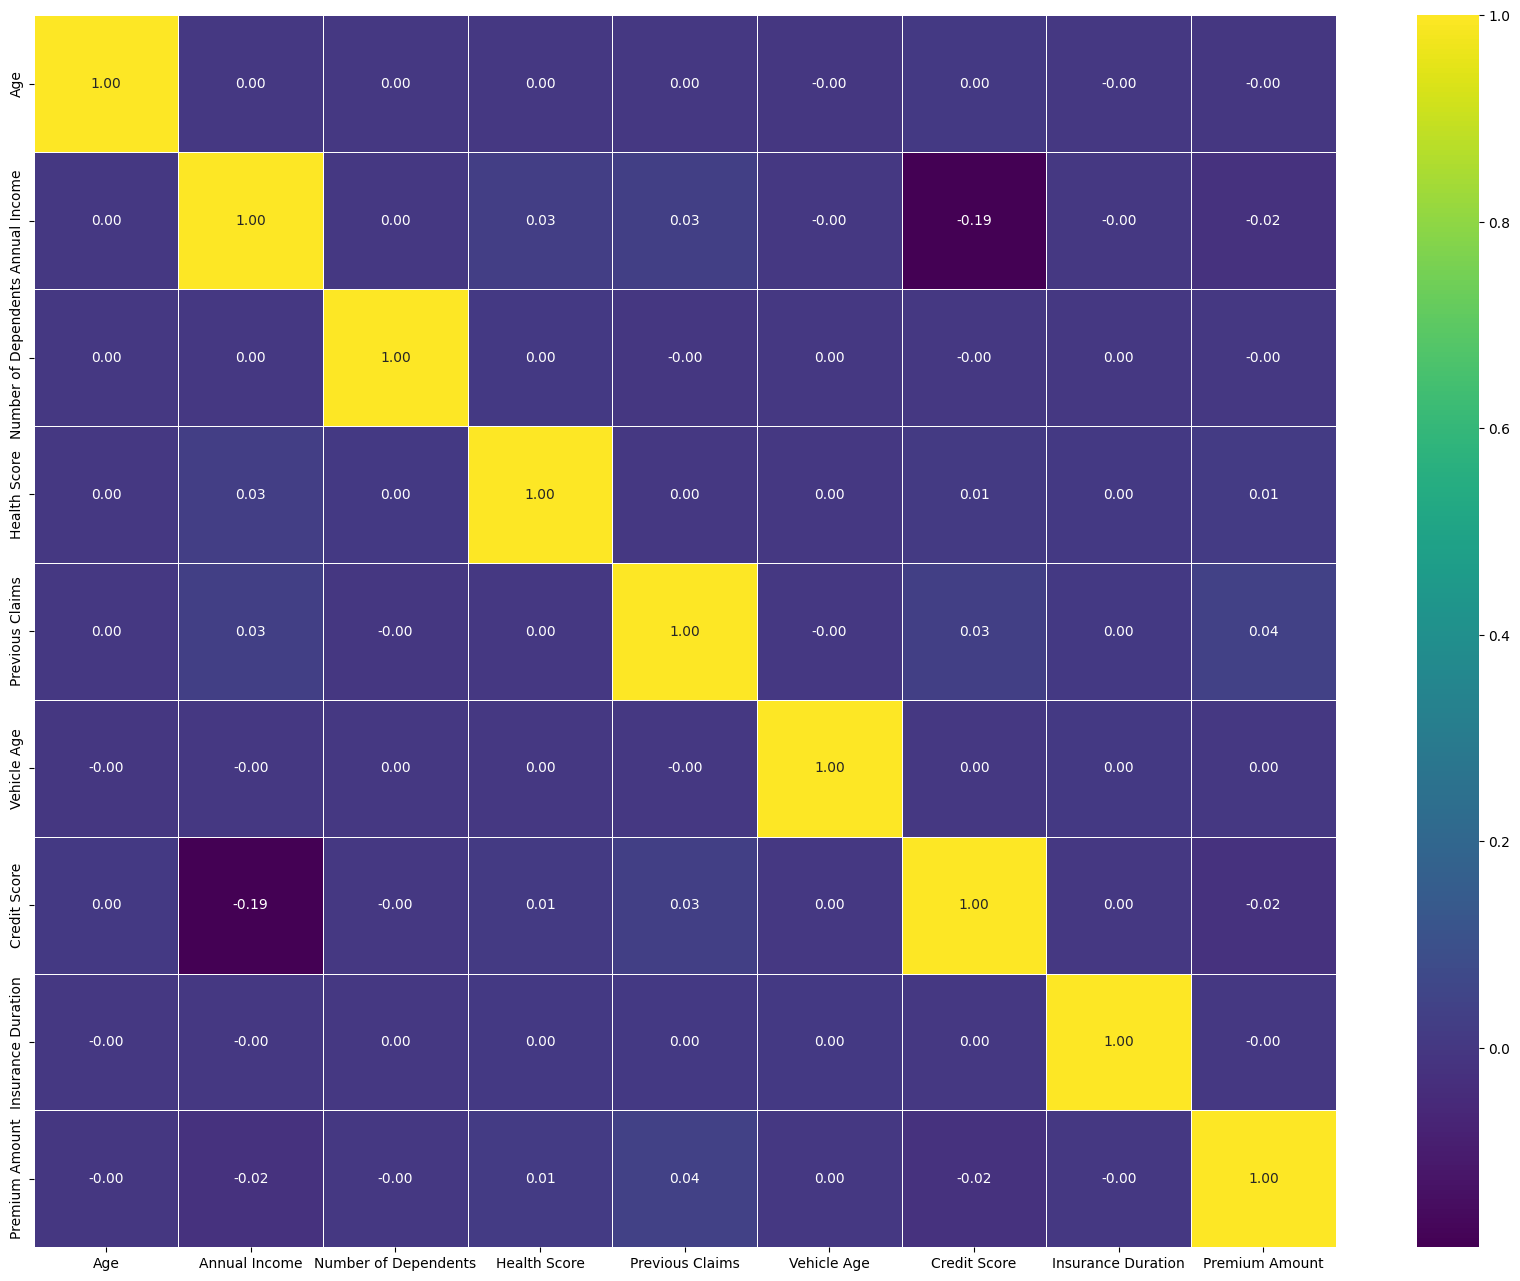

In [21]:
#Корреляция признаков между собой
plt.figure(figsize=(21, 16))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [ ]:


df['Marital Status'] = pd.Categorical(df['Marital Status'])

df['Marital Status'].cat.categories

Index(['Divorced', 'Married', 'Single'], dtype='object')

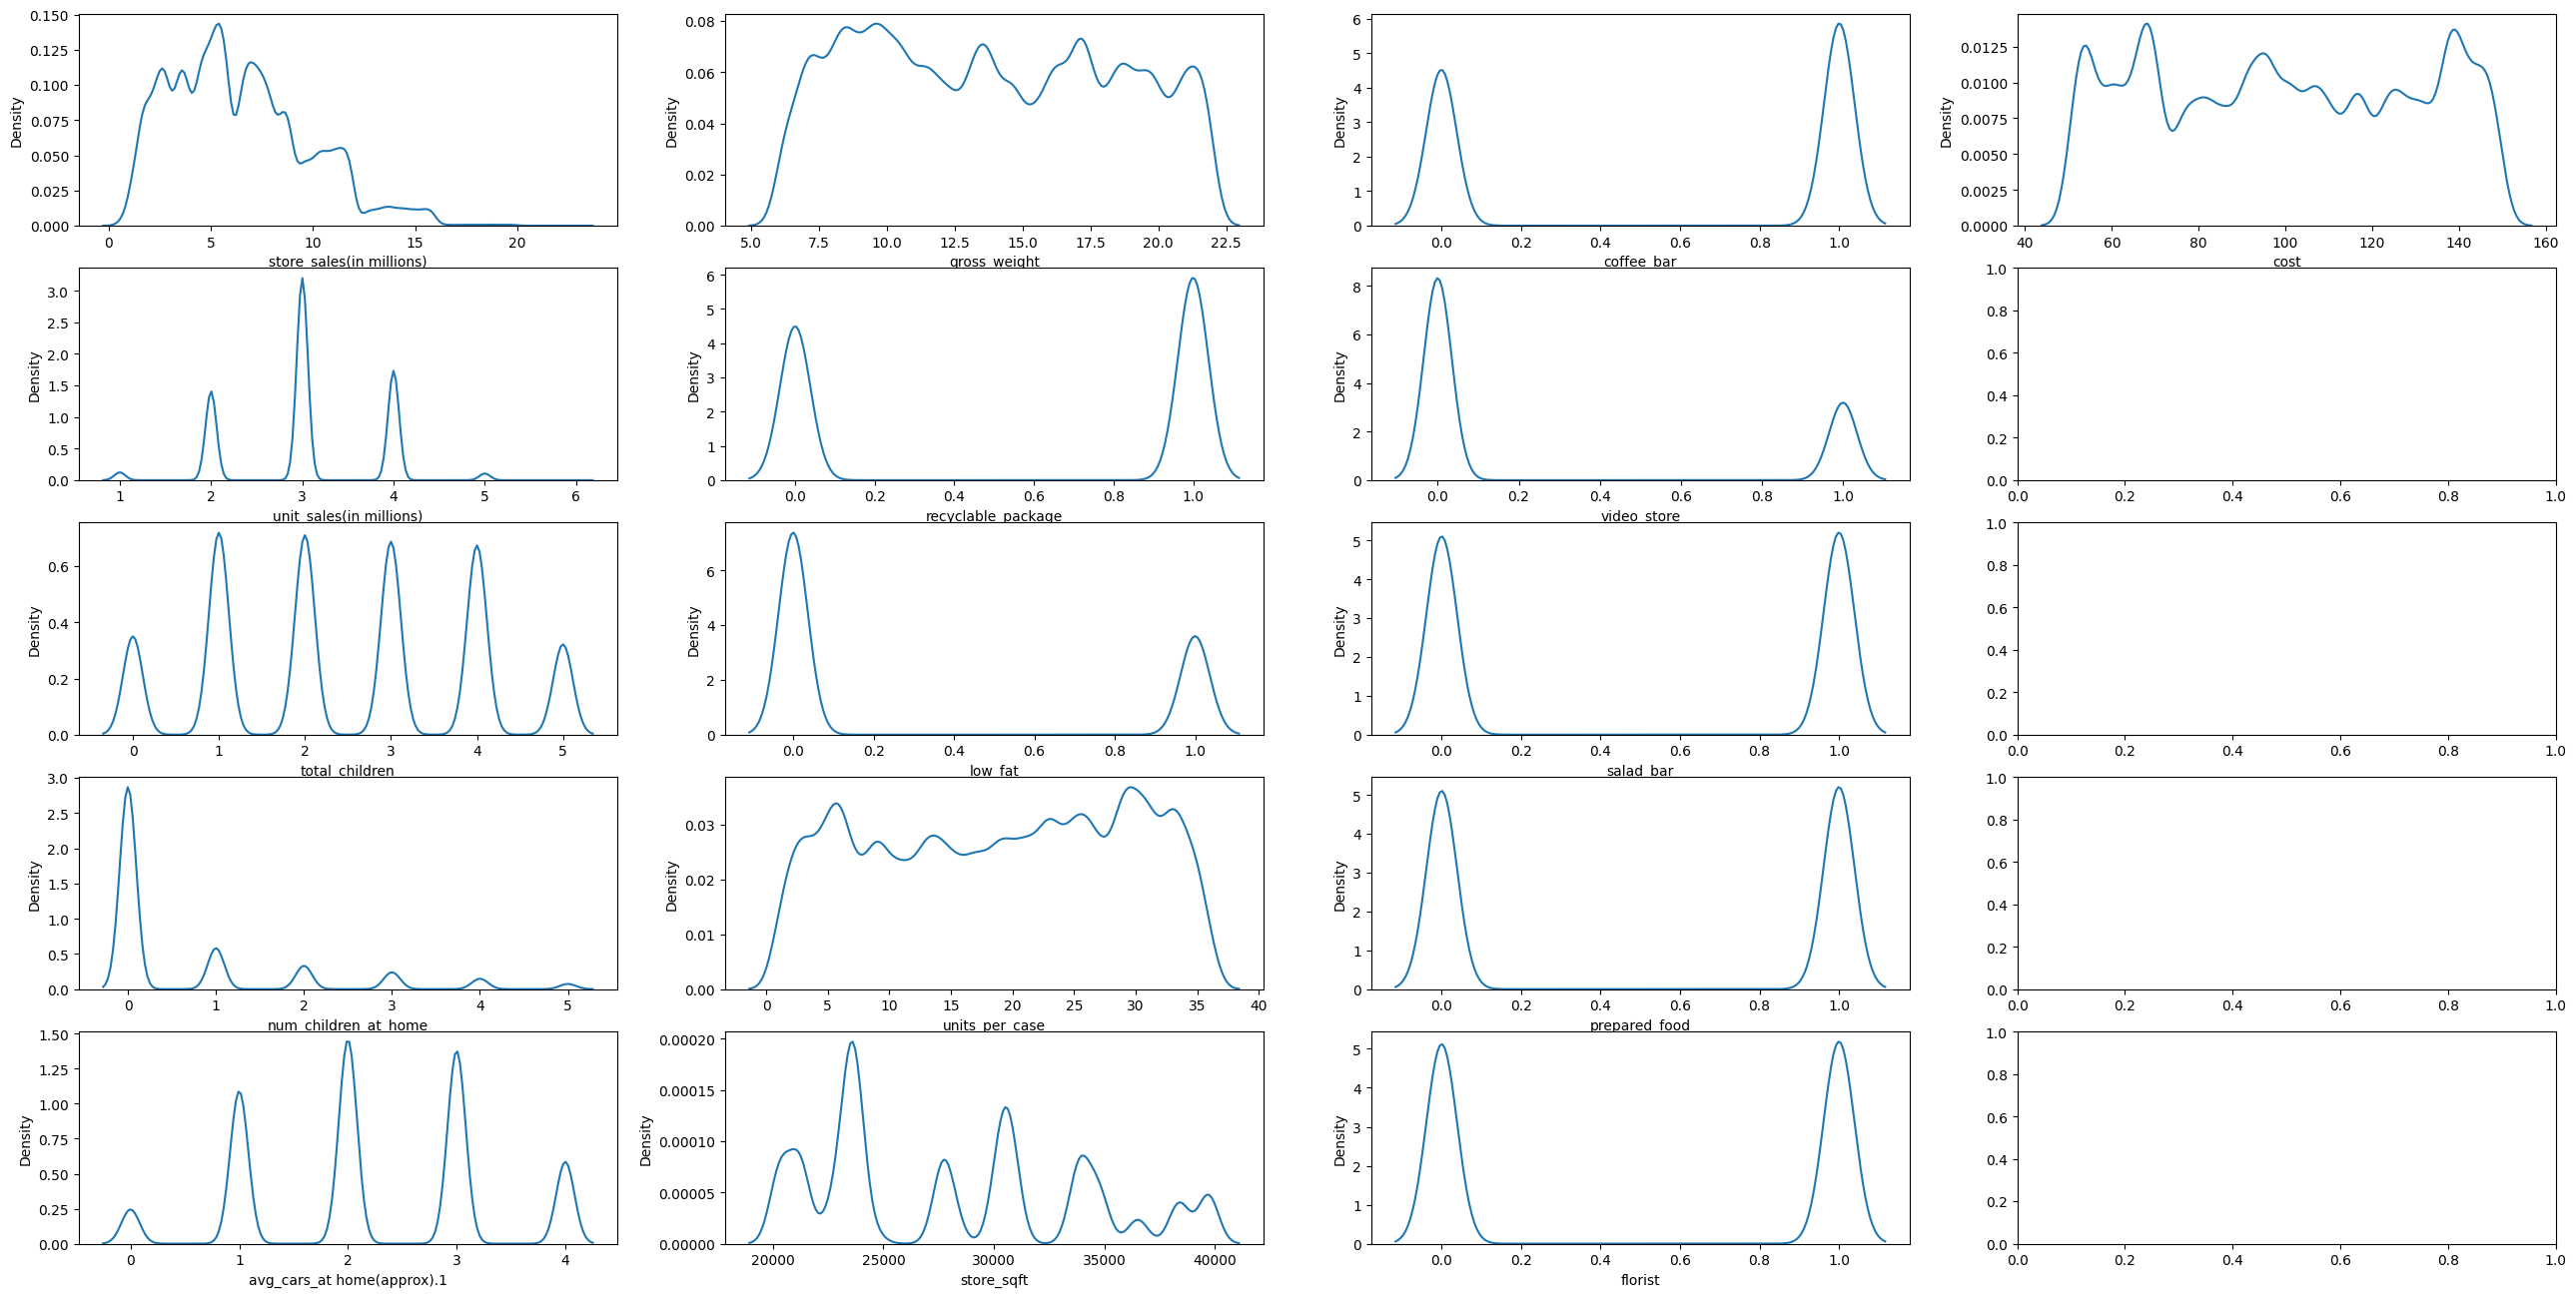

In [87]:
features = list(df.columns)

fig, axes = plt.subplots(5, len(df.columns) // 5 + 1, figsize=(32, 16))


for idx, col in enumerate(features):
    sns.kdeplot(data=df, x=col, ax=axes[idx % 5, idx // 5])

<Axes: xlabel='store_sales(in millions)', ylabel='Density'>

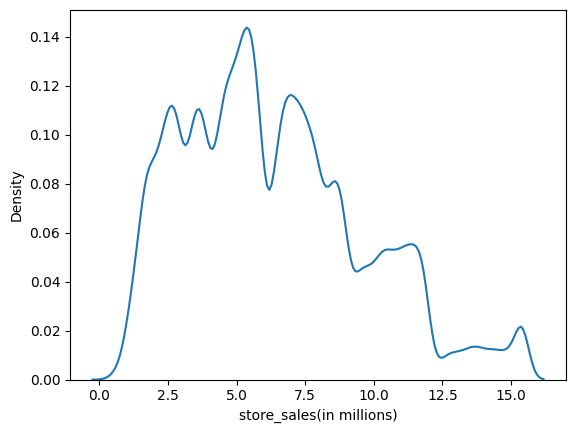

In [88]:
col = 'store_sales(in millions)'
#график store_sales(in millions) имеет выраженные выбросы
def replace_outliers(dataframe, column):

    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return np.where(dataframe[column] > upper, upper, dataframe[column])

df[col] = replace_outliers(df, col)

#график распределения после коррекции выбросов
sns.kdeplot(data=df, x='store_sales(in millions)')

<Axes: >

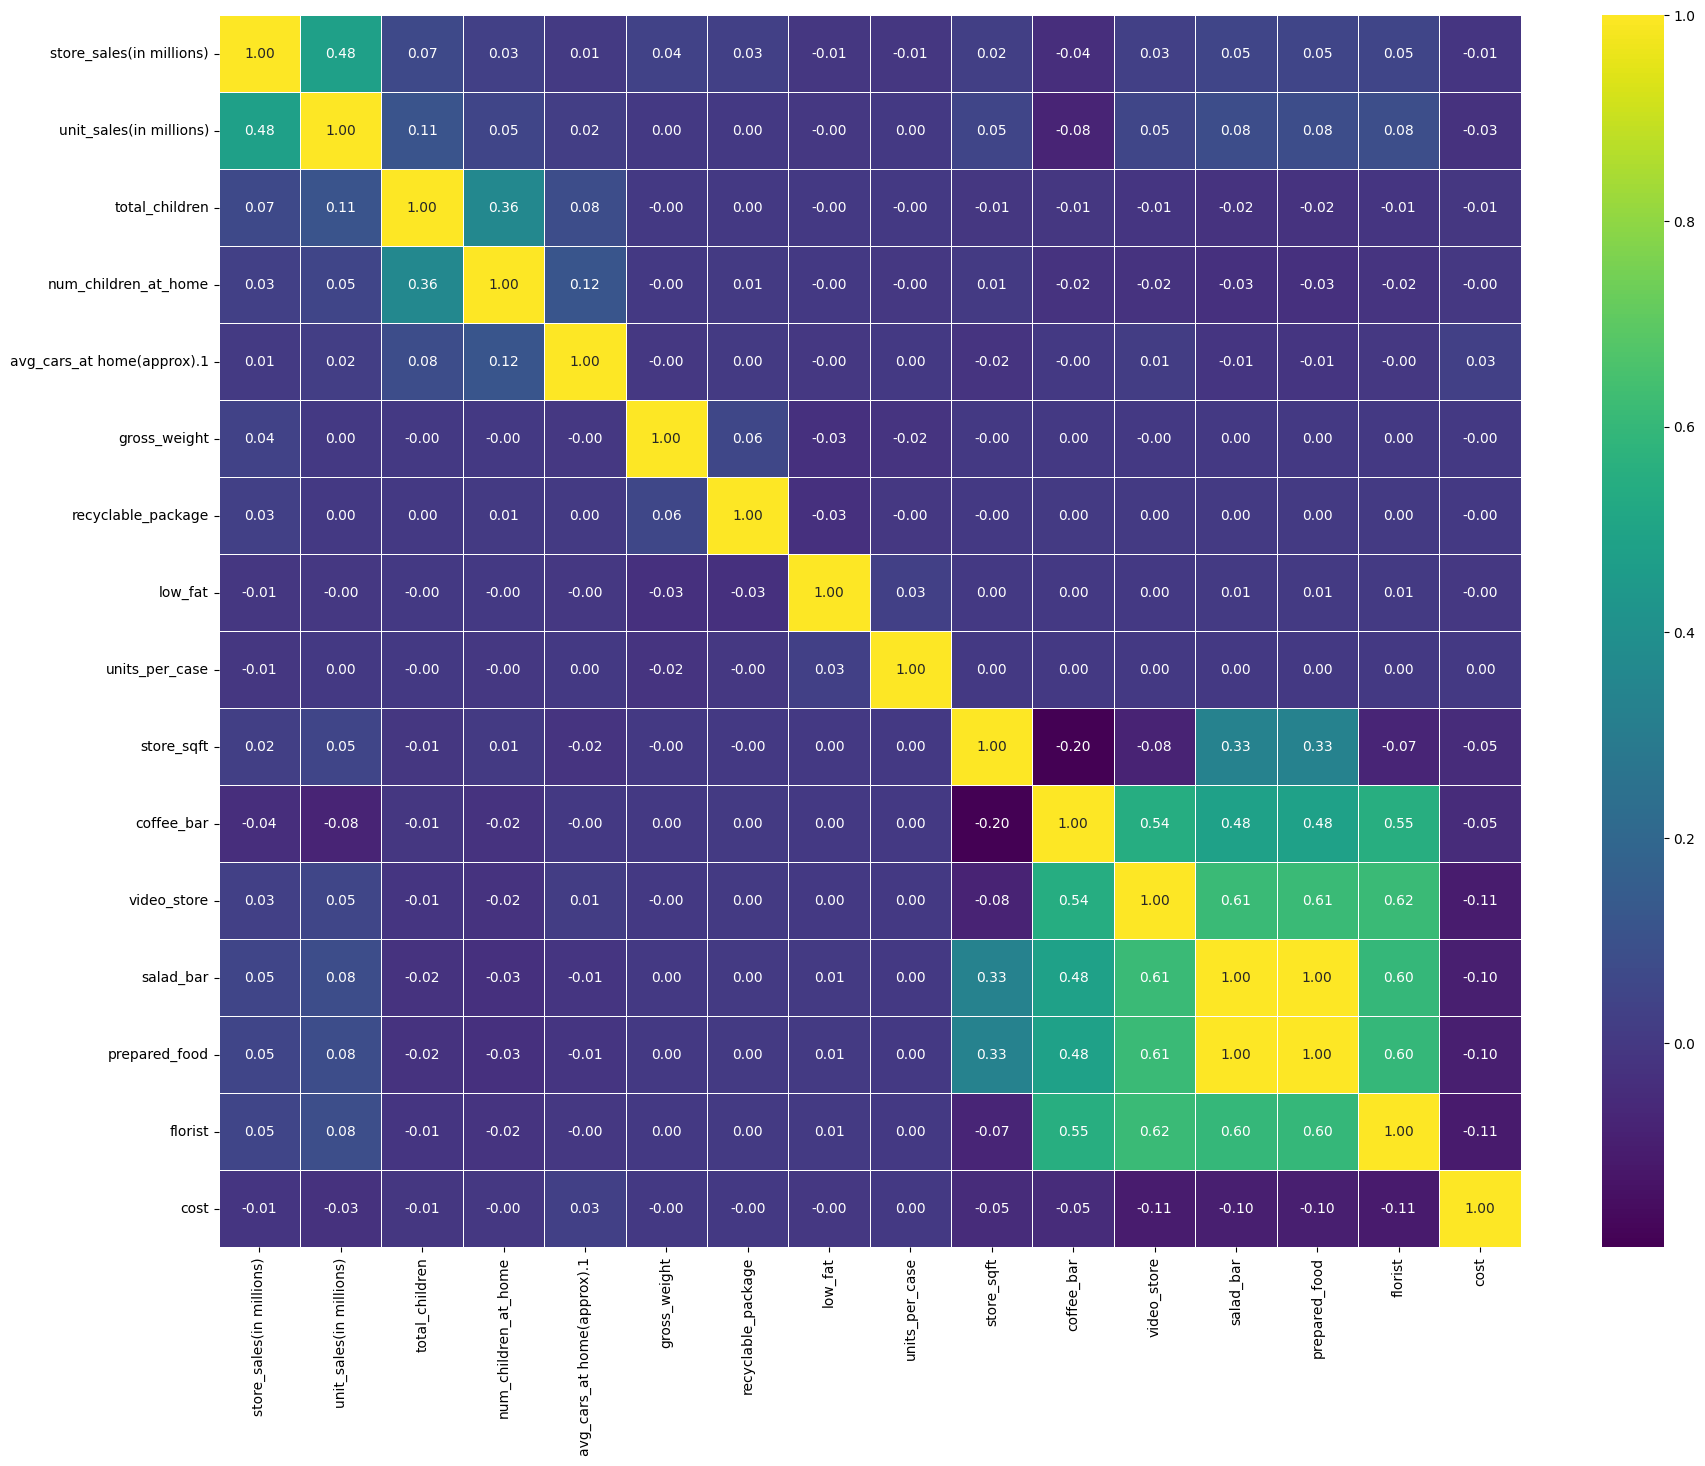

In [89]:
#Корреляция признаков между собой
plt.figure(figsize=(21, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [90]:
y = df['cost']
X = df.drop(columns=['cost'])

In [91]:
#Разбиваем та тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler() #корректно обрабатывает выбросы
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(score_func=f_regression, k=7)    #Подобрал что больше 7 уже не растет качество модели
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


sk_model = Pipeline([
    ('scaler', RobustScaler()),  # нормализация данных с учетом выбросов
    ('linear', LinearRegression())  #модель линейная
])

sk_model.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('linear', LinearRegression())])

In [93]:

y_pred_train = sk_model.predict(X_train_selected)
y_pred_test = sk_model.predict(X_test_selected)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Тренировочные данные')
print(f'mae: {mean_absolute_error(y_train, y_pred_train):.2f}, MSE: {mean_squared_error(y_train, y_pred_train):.2f}, r2: {r2_score(y_train, y_pred_train):.2f}')


print('Тестовые данные')
print(f'mae: {mean_absolute_error(y_test, y_pred_test):.2f}, MSE: {mean_squared_error(y_test, y_pred_test):.2f}, r2: {r2_score(y_test, y_pred_test):.2f}')


Тренировочные данные
mae: 25.56, MSE: 878.57, r2: 0.02
Тестовые данные
mae: 25.64, MSE: 881.29, r2: 0.02


<Axes: ylabel='coeffs'>

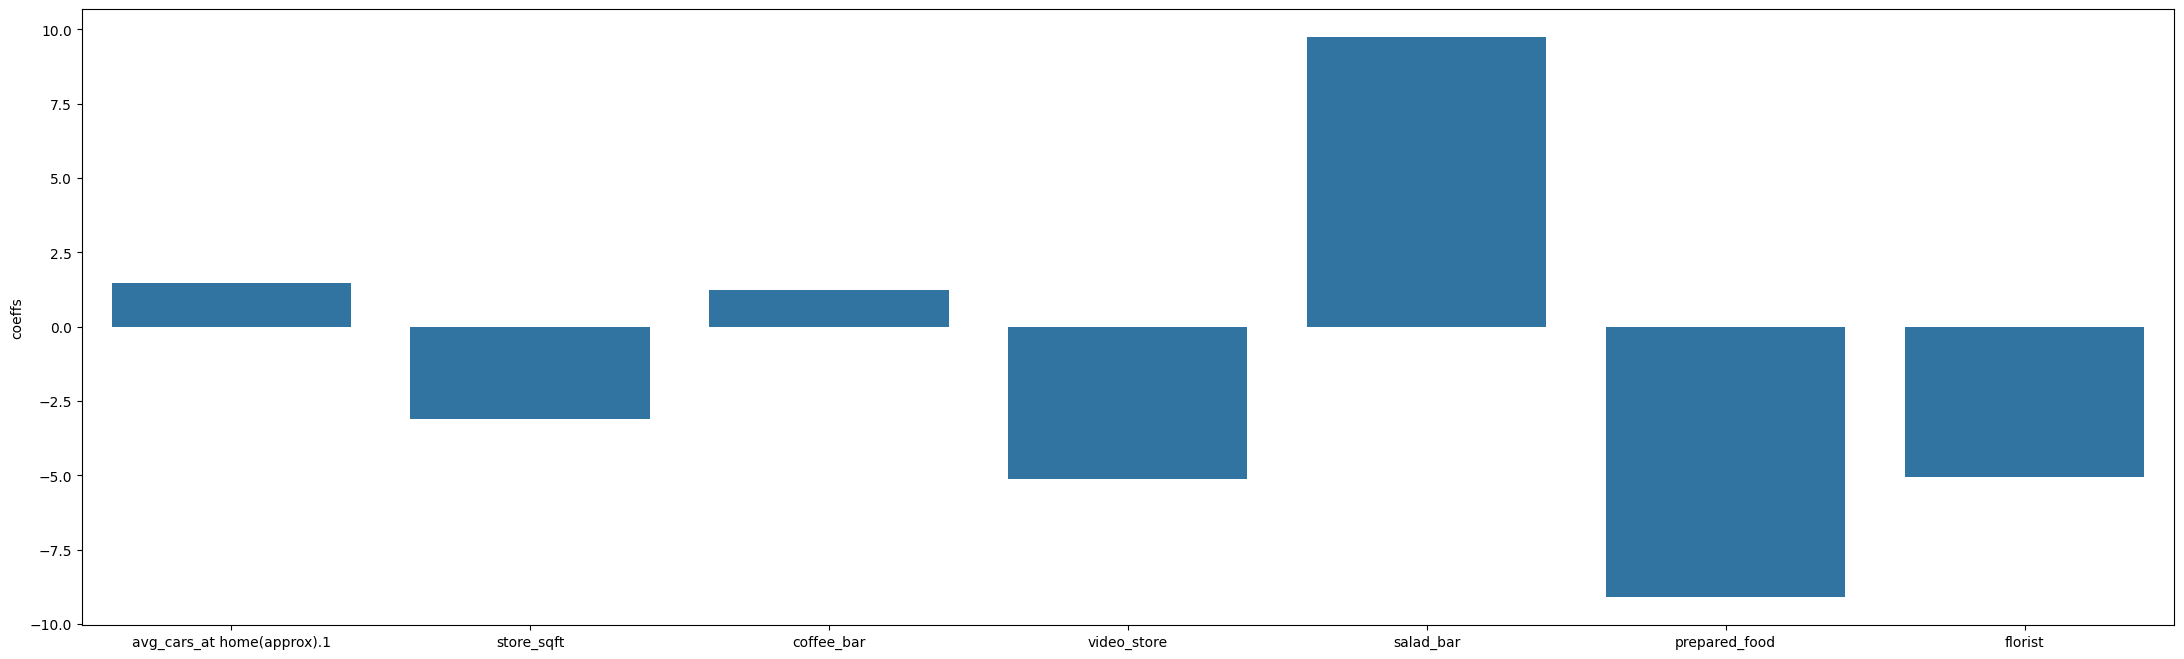

In [95]:
#Визуализируем коэффициенты модели
plt.figure(figsize=(27, 8))

cols_idxs = selector.get_support(indices=True)  #get feature names from feature selector
features_df_new = X_train.iloc[:,cols_idxs]

coefs = pd.DataFrame(data=sk_model["linear"].coef_, index = features_df_new.columns, columns=['coeffs'])

sns.barplot(data=coefs['coeffs'])

In [96]:
#Строим модель на базе OLS
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

X_train_st = sm.add_constant(X_train_scaled)

ols_model = sm.OLS(y_train, X_train_st)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     801.5
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:19:47   Log-Likelihood:            -1.3860e+06
No. Observations:              288268   AIC:                         2.772e+06
Df Residuals:                  288260   BIC:                         2.772e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.3682      0.145    684.250      0.000      99.084      99.653
x1             1.4677      0.102     14.402      0.000       1.268       1.667
x2            -3.1129      0.118    -26.386      0.000      -3.344      -2.882
x3             1.2170      0.148      8.209      0.000       0.926       1.508
x4            -5.1375      0.180    -28.587      0.000      -5.490      -4.785
x5             9.7332      6.469      1.505      0.132      -2.946      22.412
x6            -9.0992      6.469     -1.407      0.160     -21.778       3.580
x7            -5.0685      0.158    -32.012      0.000      -5.379      -4.758
==============================================================================
Omnibus:                   259808.717   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17394.925
Skew:                           0.033   Prob(JB):                         0.00
Kurtosis:                       1.798   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
X_test_st = sm.add_constant(X_test_scaled)

y_pred_train = results.predict(X_train_st)
y_pred_test = results.predict(X_test_st)

print('Тренировочные данные')
print(f'mae: {mean_absolute_error(y_train, y_pred_train):.2f}, MSE: {mean_squared_error(y_train, y_pred_train):.2f}, r2: {r2_score(y_train, y_pred_train):.2f}')


print('Тестовые данные')
print(f'mae: {mean_absolute_error(y_test, y_pred_test):.2f}, MSE: {mean_squared_error(y_test, y_pred_test):.2f}, r2: {r2_score(y_test, y_pred_test):.2f}')

Тренировочные данные
mae: 25.56, MSE: 878.57, r2: 0.02
Тестовые данные
mae: 25.64, MSE: 881.29, r2: 0.02


<Axes: ylabel='coeffs'>

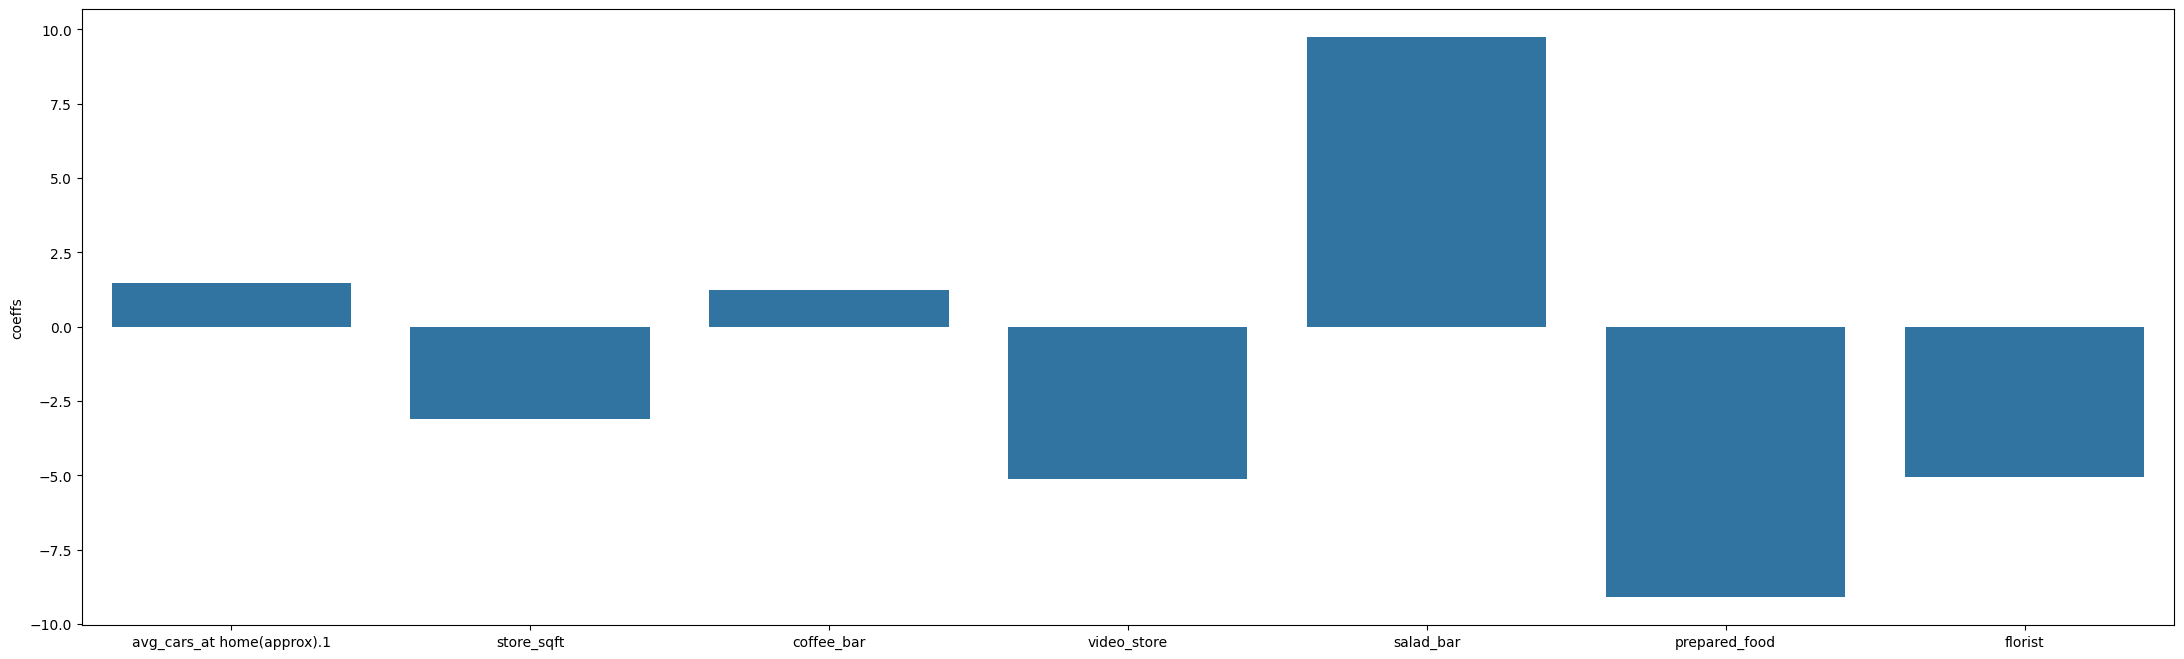

In [98]:
plt.figure(figsize=(27, 8))
cols_idxs = selector.get_support(indices=True)  #get feature names from feature selector
features_df_new = X_train.iloc[:,cols_idxs]

coefs = pd.DataFrame(data=sk_model["linear"].coef_, index = features_df_new.columns, columns=['coeffs'])

sns.barplot(data=coefs['coeffs'])

In [99]:
#Модель Линейной регрессии из библиотеки Sklearn и OLS Показывают одинаковые результаты и значения коэффициентов. 
#Возможно внутри они реализуют одинаковй алгоритм работы с данными
# модель из библиотеки sklearn имеет лучшую интеграцию с фрйемвороком sklearn, OLS когда нужны статистические метрики 
# Полученные параметры модели на тестовых данных 25.57, MSE: 878.71, r2: 0.02